In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

#pd.set_option('max_rows', 20)

In [3]:
#Defining additional NaN values
missing_values = ['na','--','?','-','None','none','non']
#df = pd.read_csv('movies.csv', na_values=missing_values) #, encoding = "ISO-8859-1"
df = pd.read_csv('movies.csv', header=0, sep=',', engine='python', names=['movie_id', 'movie_title', 'movie_genre']) 

In [4]:
print('Movies_df Shape:',df.shape)
df

Movies_df Shape: (9742, 3)


,movie_id,movie_title,movie_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [83]:
df.isnull()

,movie_id,movie_title,movie_genre
0,False,False,False
1,False,False,True
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9737,False,False,False
9738,False,False,False
9739,False,False,False
9740,False,False,False


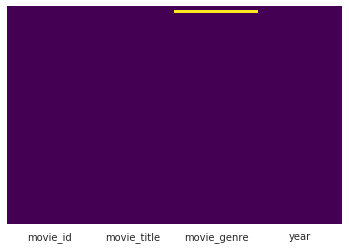

In [116]:
sns.heatmap(df.head(60).isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [86]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
df['year'] = df.movie_title.str.extract('(\d\d\d\d)',expand=False)
df.head(3)

,movie_id,movie_title,movie_genre,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),NaN,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995


In [87]:
#Removing the years from the 'title' column
df['title'] = df.movie_title
df['movie_title'] = df.movie_title.str.replace('(\(\d\d\d\d\))', '')
df.head(3)

,movie_id,movie_title,movie_genre,year,title
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story (1995)
1,2,Jumanji,NaN,1995,Jumanji (1995)
2,3,Grumpier Old Men,Comedy|Romance,1995,Grumpier Old Men (1995)


In [88]:
del df['title']
df.head(3)

,movie_id,movie_title,movie_genre,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,NaN,1995
2,3,Grumpier Old Men,Comedy|Romance,1995


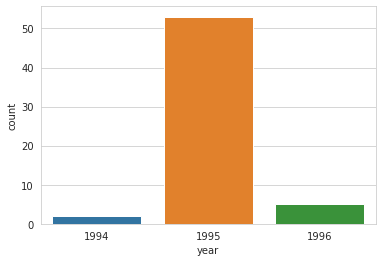

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='year',data=df.head(60))

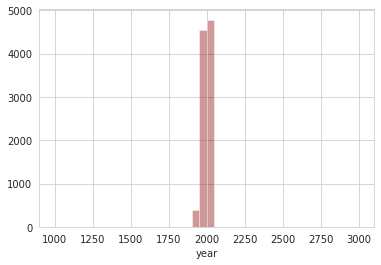

In [118]:
#sns.countplot(x='V149',hue='PhisV',data=df_f1.toPandas(),palette='RdBu_r')
sns.distplot(df['year'].dropna(),kde=False,color='darkred',bins=40)

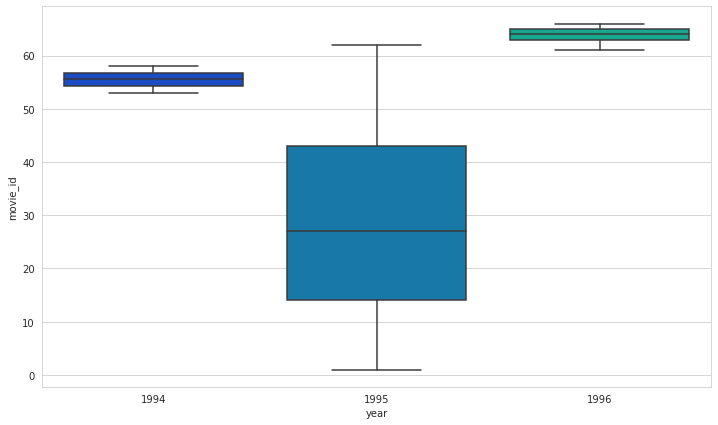

In [122]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='year',y='movie_id',data=df.head(60),palette='winter')

In [90]:
dfg = df.movie_genre.str.get_dummies(sep='|')
dfg.head(3)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
#We load the movie file. movie_genre has the genres of the film separated by "::"
movies_df = pd.read_table('movies.dat', header=None, sep='::', engine='python', names=['movie_id', 'movie_title', 'movie_genre'], encoding = "ISO-8859-1")
print('Movies_df Shape:',movies_df.shape)
movies_df.head()

Movies_df Shape: (3883, 3)


,movie_id,movie_title,movie_genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
movies_df = pd.concat([movies_df, movies_df.movie_genre.str.get_dummies(sep='|')], axis=1)
movies_df.head()

,movie_id,movie_title,movie_genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# A variable is created with the categories
movie_categories = movies_df.columns[3:]
movie_categories

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [67]:

#load the rantings file, is a set of users with the movies they've seen and their punuation
ratings = pd.read_table('ratings.dat', header=None, sep='::', engine='python', names=['user_id', 'movie_id', 'rating', 'timestamp'])

#We deleted the date the rating was created
del ratings ['timestamp']
ratings.head()


,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [68]:
#We added the title of the film
ratings = pd.merge(ratings, movies_df, on='movie_id')[['user_id', 'movie_title', 'movie_id','rating']]

ratings.head()

,user_id,movie_title,movie_id,rating
0,1,One Flew Over the Cuckoo's Nest (1975),1193,5
1,2,One Flew Over the Cuckoo's Nest (1975),1193,5
2,12,One Flew Over the Cuckoo's Nest (1975),1193,4
3,15,One Flew Over the Cuckoo's Nest (1975),1193,4
4,17,One Flew Over the Cuckoo's Nest (1975),1193,5


In [69]:
# We create a new matrix with the ratios of each user for all movies
ratings_matriz = ratings.pivot_table(values='rating', index='user_id', columns='movie_title')

# We fill with 0 in the Nan values#
#ratings_matriz.fillna(0, inplace=True)
ratings_matriz=ratings_matriz.apply(lambda x:x.fillna(x.mean()), axis=0 )
ratings_matriz=ratings_matriz.apply(lambda x:x - x.mean(), axis=1 )


movie_index = ratings_matriz.columns

ratings_matriz.head()

movie_title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,-0.215674,0.128728,-0.550393,-0.331810,0.470867,-0.742701,0.180156,0.353760,-0.195997,1.052754,...,0.390211,0.147801,0.057299,0.133446,0.257299,0.171092,0.508130,0.257299,-0.720962,0.013397
2,-0.210064,0.134337,-0.544784,-0.326200,0.476476,-0.737091,0.185766,0.359369,-0.190388,1.058363,...,0.395820,0.153410,0.062909,0.139055,0.262909,0.176702,0.513739,0.262909,-0.715352,0.019006
3,-0.213476,0.130926,-0.548195,-0.329612,0.473065,-0.740503,0.182354,0.355957,-0.193799,1.054952,...,0.392409,0.149999,0.059497,0.135644,0.259497,0.173290,0.510328,0.259497,-0.718764,0.015595
4,-0.212675,0.131726,-0.547394,-0.328811,0.473866,-0.739702,0.183155,0.356758,-0.192999,1.055752,...,0.393209,0.150799,0.060298,0.136445,0.260298,0.174091,0.511128,0.260298,-0.717963,0.016395
5,-0.182296,0.162105,-0.517016,-0.298432,0.504244,-0.709323,0.213534,0.387137,-0.162620,1.086131,...,0.423588,0.181178,0.090677,0.166823,0.290677,0.204470,0.541507,0.290677,-0.687584,0.046774


In [70]:
movie_index

Index(['$1,000,000 Duck (1971)', ''Night Mother (1986)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       '...And Justice for All (1979)', '1-900 (1994)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)', '12 Angry Men (1957)',
       ...
       'Young Poisoner's Handbook, The (1995)', 'Young Sherlock Holmes (1985)',
       'Young and Innocent (1937)', 'Your Friends and Neighbors (1998)',
       'Zachariah (1971)', 'Zed & Two Noughts, A (1985)', 'Zero Effect (1998)',
       'Zero Kelvin (Kjærlighetens kjøtere) (1995)', 'Zeus and Roxanne (1997)',
       'eXistenZ (1999)'],
      dtype='object', name='movie_title', length=3706)

In [11]:
#the position in Toy Story's movie listing
list(movie_index).index('Toy Story (1995)')

3411

In [12]:

corr_matrix = np.corrcoef(ratings_matriz.T)
corr_matrix.shape

(3706, 3706)

In [13]:
movies_df['movie_title'][0]

'Toy Story (1995)'

In [14]:

favorit_movie = 'Toy Story (1995)'

favorita_movie_index = list(movie_index).index(favorit_movie)

P = corr_matrix[favorita_movie_index]

list(movie_index[(P>0.4) & (P<1.0)])

['Toy Story (1995)']

In [15]:
#The Toy Story film's correlation list with each user
P

array([-0.06290601, -0.01869119, -0.04195901, ..., -0.15931814,
       -0.02565778, -0.00534232])

In [16]:
#A function that returns the correlation vector for a movie
def get_similar_movie(movie):
    corr_matrix = np.corrcoef(ratings_matriz.T)
    movie_idx = list(movie_index).index(movie)
    return corr_matrix[movie_idx]

#We return movies that are more similar to the tastes of a model user.
#If we want to recommend movies to a user, we get the list of movies they've watched and add up the correlations
#of those movies with all the others to return the movies with a greater total correlation..
def get_movie_recomendations(user):
    corr_matrix = np.corrcoef(ratings_matriz.T)
    similar_movies = np.zeros(corr_matrix.shape[0])
    for movie_id in user:
        similar_movies = similar_movies + get_similar_movie(movie_id)
        similars_df = pd.DataFrame({
        'Titulo': movie_index,
        'sum_similar': similar_movies
        })
    similars_df = similars_df[~(similars_df.Titulo.isin(user))]
    similars_df = similars_df.sort_values(by=['sum_similar'], ascending=False)
    return similars_df

In [17]:
#We're going to recommend movies to user 21, who has seen the following movies with their corresponding rating
user_21 = 21
ratings[ratings.user_id==user_21].sort_values(by=['rating'], ascending=False)

,user_id,movie_title,movie_id,rating
583304,21,Titan A.E. (2000),3745,5
707307,21,"Princess Mononoke, The (Mononoke Hime) (1997)",3000,5
70742,21,Star Wars: Episode VI - Return of the Jedi (1983),1210,5
239644,21,"South Park: Bigger, Longer and Uncut (1999)",2700,5
487530,21,Mad Max Beyond Thunderdome (1985),3704,4
707652,21,Little Nemo: Adventures in Slumberland (1992),2800,4
708015,21,Stop! Or My Mom Will Shoot (1992),3268,3
706889,21,"Brady Bunch Movie, The (1995)",585,3
623947,21,"Iron Giant, The (1999)",2761,3
619784,21,Wild Wild West (1999),2701,3


In [18]:

#Generamos un listado de títulos de películas del usuario 21 para poder añadirlo a las funciones.
#The df ratings is taken and the column movie_title.
user_film_21_list = ratings[ratings.user_id==user_21].movie_title.tolist()
user_film_21_list

["Bug's Life, A (1998)",
 'Bambi (1942)',
 'Antz (1998)',
 'Aladdin (1992)',
 'Toy Story (1995)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Who Framed Roger Rabbit? (1988)',
 'South Park: Bigger, Longer and Uncut (1999)',
 'Akira (1988)',
 'Pinocchio (1940)',
 'Mad Max Beyond Thunderdome (1985)',
 'Titan A.E. (2000)',
 "Devil's Advocate, The (1997)",
 'Prince of Egypt, The (1998)',
 'Wild Wild West (1999)',
 'Iron Giant, The (1999)',
 'Brady Bunch Movie, The (1995)',
 'Princess Mononoke, The (Mononoke Hime) (1997)',
 'Little Nemo: Adventures in Slumberland (1992)',
 'Messenger: The Story of Joan of Arc, The (1999)',
 'Stop! Or My Mom Will Shoot (1992)',
 'House Party 2 (1991)']

In [19]:

recomendations_21_user = get_movie_recomendations(user_film_21_list)
recomendations_21_user.Titulo.head(20)

3055    Snow White and the Seven Dwarfs (1937)
1865                 Lady and the Tramp (1955)
679                          Cinderella (1950)
1002                              Dumbo (1941)
1939                     Lion King, The (1994)
324                Beauty and the Beast (1991)
7                        101 Dalmatians (1961)
2770           Rescuers Down Under, The (1990)
1948                Little Mermaid, The (1989)
3412                        Toy Story 2 (1999)
2808                         Robin Hood (1973)
3026                    Sleeping Beauty (1959)
1739          James and the Giant Peach (1996)
3275                             Tarzan (1999)
97                  Alice in Wonderland (1951)
1781                   Jungle Book, The (1967)
1611       Hunchback of Notre Dame, The (1996)
2771                      Rescuers, The (1977)
2432                   Oliver & Company (1988)
1111                           Fantasia (1940)
Name: Titulo, dtype: object